In [168]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from skimage import io
import glob
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [169]:
path_to_data = "./"

In [213]:
def create_dataset(path_to_data = "./data"):
    images = glob.glob(f"{path_to_data}/**/*.jpg")
    X = []
    y = []
    for image in tqdm.tqdm(images):
        im = io.imread(image)
        label = image.split("/")[-2]
        X.append(im)
        y.append(label)
        
    labels = y
    le = LabelEncoder()
    y = keras.utils.to_categorical(le.fit_transform(labels))
    X, y = shuffle(X,y)
    X = np.array(X).reshape(len(X), 60, 80, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    return X_train, X_test, y_train, y_test, le
        
    

In [214]:
X_train, X_test, y_train, y_test, le = create_dataset()

100%|██████████| 1200/1200 [00:00<00:00, 2674.14it/s]


In [215]:
def create_model(output_size):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (60,80,1)))
    model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu"))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(output_size, activation = "softmax"))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [216]:
model = create_model(len(le.classes_))

In [217]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5)

Train on 900 samples, validate on 300 samples
Epoch 1/5
900/900 [==============================] - 15s 17ms/sample - loss: 93.9601 - accuracy: 0.6822 - val_loss: 0.2528 - val_accuracy: 0.9567
Epoch 2/5
900/900 [==============================] - 15s 16ms/sample - loss: 0.0483 - accuracy: 0.9844 - val_loss: 0.0333 - val_accuracy: 1.0000
Epoch 3/5
900/900 [==============================] - 13s 15ms/sample - loss: 0.0128 - accuracy: 0.9944 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 4/5
900/900 [==============================] - 14s 16ms/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 7.0013e-04 - val_accuracy: 1.0000
Epoch 5/5
900/900 [==============================] - 15s 16ms/sample - loss: 0.0016 - accuracy: 0.9989 - val_loss: 5.7784e-04 - val_accuracy: 1.0000


In [194]:
model.save("model_home")

classes = le.classes_
np.save("classes.npy", classes)

INFO:tensorflow:Assets written to: model_home/assets


In [196]:
prediction = model.predict_classes(X_test[14].reshape(1,60,80,1))

In [197]:
le.classes_[prediction]

array(['question'], dtype='<U10')

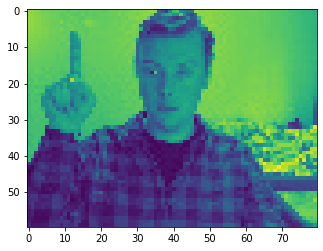

In [198]:
plt.imshow(X_test[14][:,:,0])

In [199]:
le.fit(labels)

LabelEncoder()

In [200]:
le.classes_

array(['background', 'ok', 'question', 'wave'], dtype='<U10')